# Wind energy - Cluster Analysis

Countries grouped by cluster

cluster nb : 0 EE FI LT LV PL SE

cluster nb : 1 ES PT

cluster nb : 2 AT CH CZ HR HU IT SI SK

cluster nb : 3 BE DE DK FR IE LU NL UK

cluster nb : 4 CY NO

cluster nb : 5 BG EL RO

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 300

import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "../../../datasets/_classified/kaggle/"

In [3]:
countries_lst = ['FI', 'PT', 'IT', 'FR', 'NO', 'RO']
df_wind_on = pd.read_csv(path + "EMHIRES_WIND_COUNTRY_June2019.csv")
df_wind_on = df_wind_on[countries_lst]
df_wind_on.head(2)

,FI,PT,IT,FR,NO,RO
0,"0,31303","0,22683","0,33069","0,17573","0,26292","0,05124"
1,"0,33866","0,25821","0,30066","0,16771","0,26376","0,04665"


Dealing with timestamps

In [4]:
def add_time(_df):
    "Returns a DF with two new cols : the time and hour of the day"
    t = pd.date_range(start='1/1/1986', periods=_df.shape[0], freq = 'H')
    t = pd.DataFrame(t)
    _df = pd.concat([_df, t], axis=1)
    _df.rename(columns={ _df.columns[-1]: "time" }, inplace = True)
    _df['hour'] = _df['time'].dt.hour
    _df['month'] = _df['time'].dt.month
    _df['week'] = _df['time'].dt.week
    return _df

In [5]:
for c in df_wind_on.columns:
    df_wind_on[c] = df_wind_on[c].str.replace(',', '.').astype('float64')

df_wind_on = add_time(df_wind_on)
df_wind_on.tail(2)

,FI,PT,IT,FR,NO,RO,time,hour,month,week
262966,0.47398,0.08945,0.00625,0.21519,0.54109,0.11247,2015-12-31 22:00:00,22,12,53
262967,0.47473,0.10206,0.00859,0.17319,0.54552,0.12690,2015-12-31 23:00:00,23,12,53


In [6]:
df_wind_on.dtypes

FI              float64
PT              float64
IT              float64
FR              float64
NO              float64
RO              float64
time     datetime64[ns]
hour              int64
month             int64
week              int64
dtype: object

# Data Analysis

In [7]:
def plot_hourly(df, title):
    plt.figure(figsize=(14, 9))
    for c in df.columns:
        if c != 'hour':
            sns.lineplot(x="hour", y=c, data=df, label=c)
            #plt.legend(c)
    plt.title(title)
    plt.show()

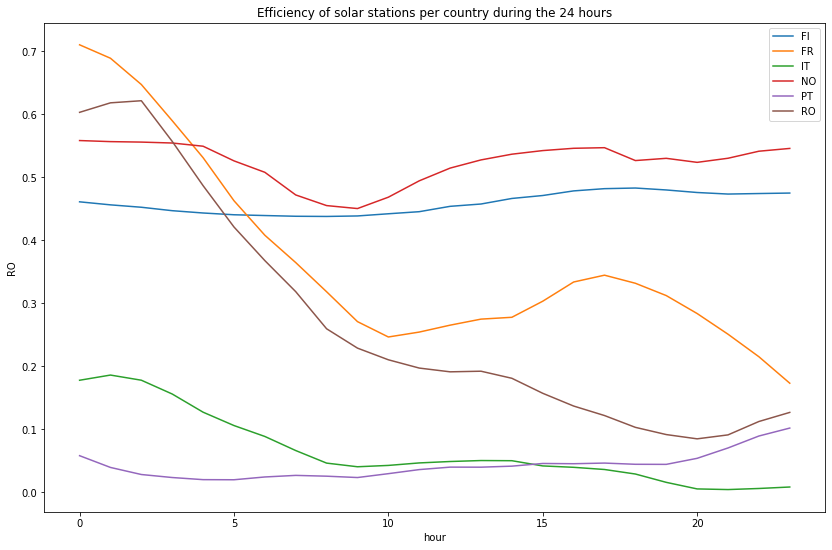

In [8]:
plot_hourly(df_wind_on[df_wind_on.columns.difference(['time', 'month', 'week'])][-24:], "Efficiency of solar stations per country during the 24 hours")

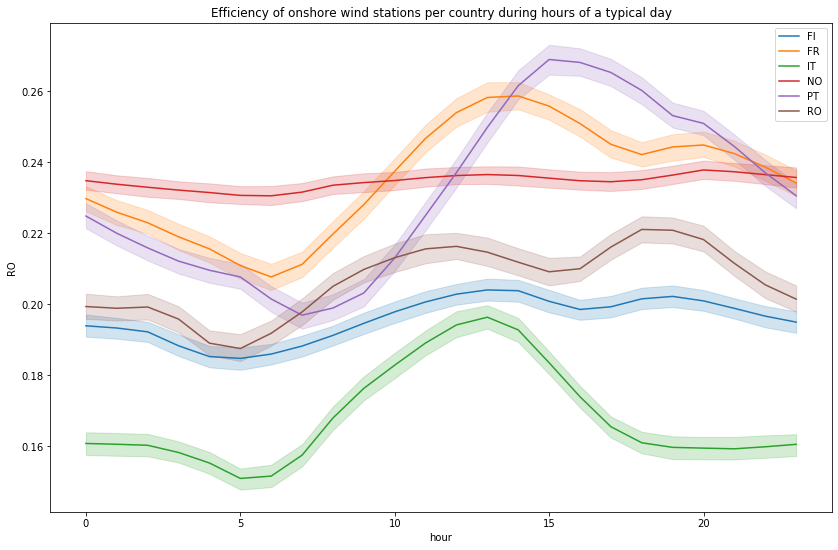

In [9]:
plot_hourly(df_wind_on[df_wind_on.columns.difference(['time', 'month', 'week'])], "Efficiency of onshore wind stations per country during hours of a typical day")

Text(0.5, 1.0, "Distribution of the station's efficiency for non null values (ie during the day)")

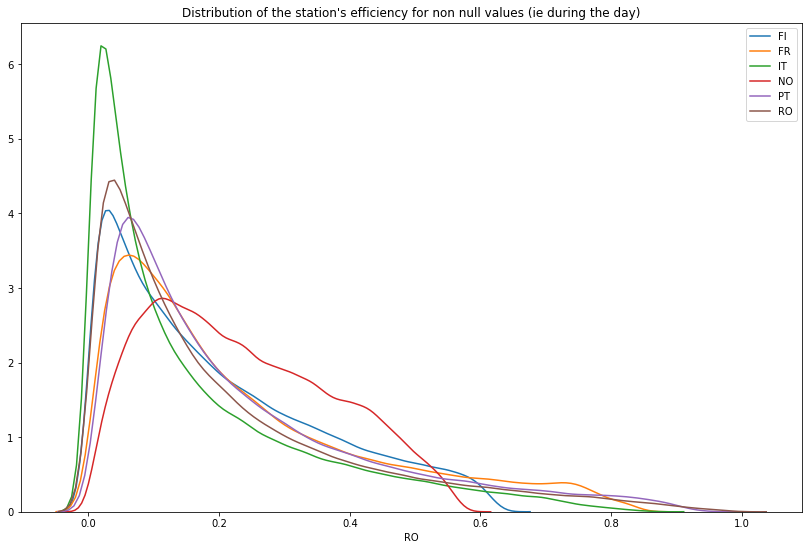

In [10]:
temp_df = df_wind_on[df_wind_on.columns.difference(['time', 'hour', 'month', 'week'])]
plt.figure(figsize=(14, 9))
for col in temp_df.columns:
    sns.distplot(temp_df[temp_df[col] != 0][col], label=col, hist=False)
plt.title("Distribution of the station's efficiency for non null values (ie during the day)")

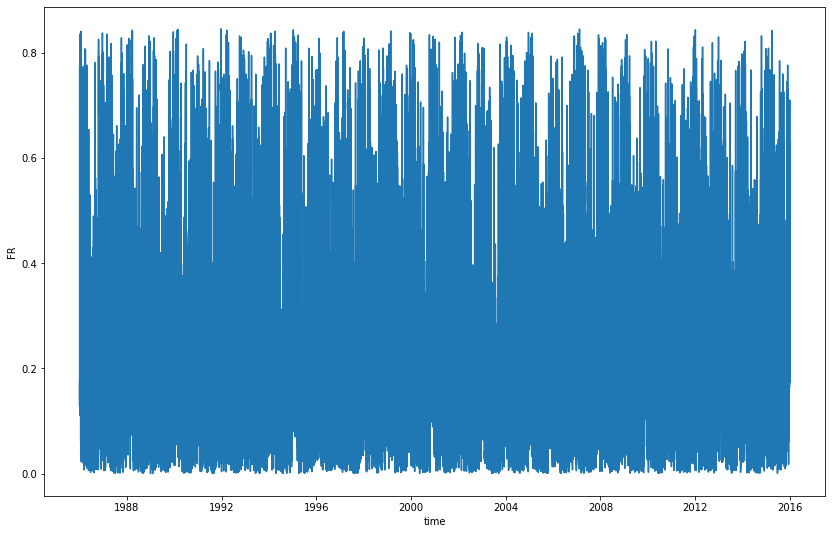

In [11]:
plt.figure(figsize=(14, 9))
sns.lineplot(x = df_wind_on.time, y = df_wind_on['FR'])

Text(0.5, 1.0, 'Efficiency across the months per country')

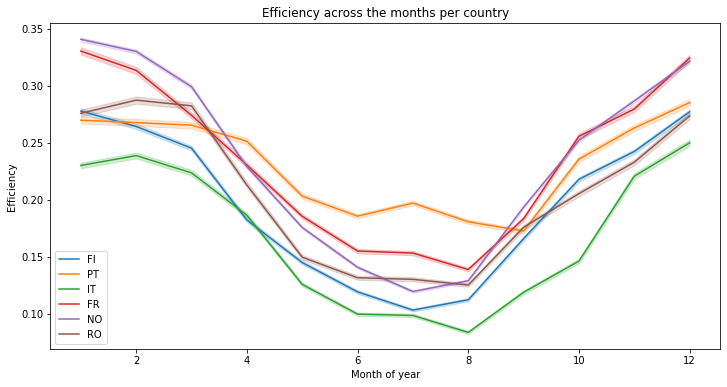

In [12]:
plt.figure(figsize=(12, 6))
for c in countries_lst:
    temp_df = df_wind_on[[c, 'month']]
    sns.lineplot(x=temp_df["month"], y=temp_df[c], label=c)
plt.xlabel("Month of year")
plt.ylabel("Efficiency") 
plt.title("Efficiency across the months per country")

Text(0.5, 1.0, 'Efficiency across the weeks per country')

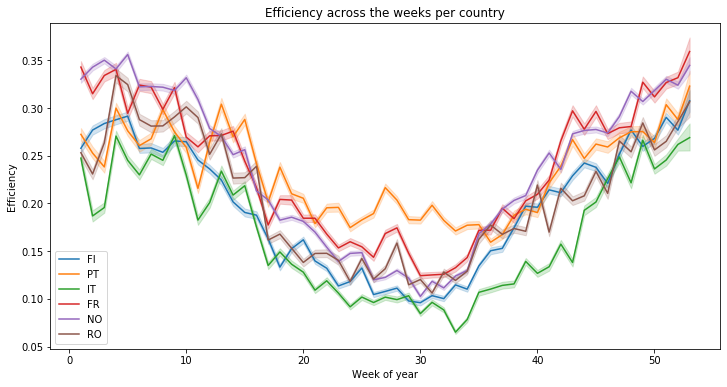

In [13]:
plt.figure(figsize=(12, 6))
for c in countries_lst:
    temp_df = df_wind_on[[c, 'week']]
    sns.lineplot(x=temp_df["week"], y=temp_df[c], label=c)
plt.xlabel("Week of year")
plt.ylabel("Efficiency") 
plt.title("Efficiency across the weeks per country")

In [54]:
temp_df = df_wind_on.copy()
temp_df['year'] = temp_df['time'].dt.year
temp_df.head()

,FI,PT,IT,FR,NO,RO,time,hour,month,week,year
0,0.31303,0.22683,0.33069,0.17573,0.26292,0.05124,1986-01-01 00:00:00,0,1,1,1986
1,0.33866,0.25821,0.30066,0.16771,0.26376,0.04665,1986-01-01 01:00:00,1,1,1,1986
2,0.36834,0.27921,0.27052,0.15877,0.26695,0.04543,1986-01-01 02:00:00,2,1,1,1986
3,0.39019,0.33106,0.24614,0.14818,0.27101,0.04455,1986-01-01 03:00:00,3,1,1,1986
4,0.40209,0.38668,0.21655,0.13631,0.28097,0.05438,1986-01-01 04:00:00,4,1,1,1986


Text(0.5, 1.0, 'Efficiency across the years per country')

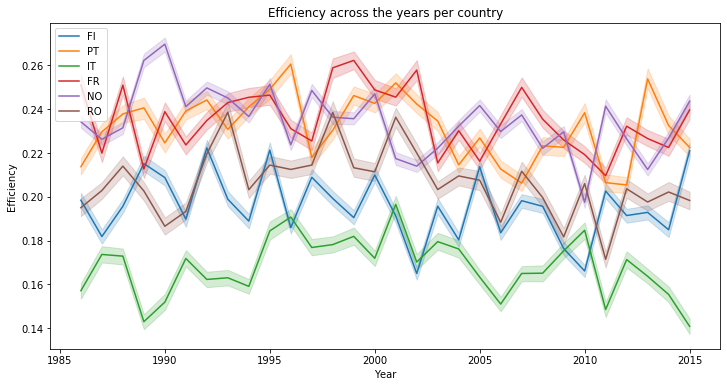

In [55]:
plt.figure(figsize=(12, 6))
for c in countries_lst:
    temp_df_ = temp_df[[c, 'year']]
    sns.lineplot(x=temp_df_["year"], y=temp_df_[c], label=c)
plt.xlabel("Year")
plt.ylabel("Efficiency") 
plt.title("Efficiency across the years per country")

In [56]:
temp_df = temp_df.drop(columns=['time', 'hour', 'month', 'week', 'year'])
temp_df.describe()

,FI,PT,IT,FR,NO,RO
count,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000
mean,0.195797,0.231411,0.168171,0.235092,0.234455,0.206581
std,0.158490,0.200070,0.174528,0.197681,0.138302,0.199103
min,0.000000,0.000070,0.000040,0.000070,0.000260,0.000000
25%,0.062760,0.080390,0.036400,0.082140,0.119130,0.058230
50%,0.153390,0.164075,0.101570,0.170620,0.214960,0.136680
75%,0.298873,0.323300,0.246170,0.337360,0.339190,0.291813
max,0.634540,0.959080,0.870380,0.845160,0.579430,0.992050


In [57]:
def plot_by_country(_df, title, nb_col):
    _df = _df.describe().iloc[nb_col, :]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=_df.index, y=_df.values)
    plt.title(title)

#plot_by_country("Mean efficiency by country", 1)

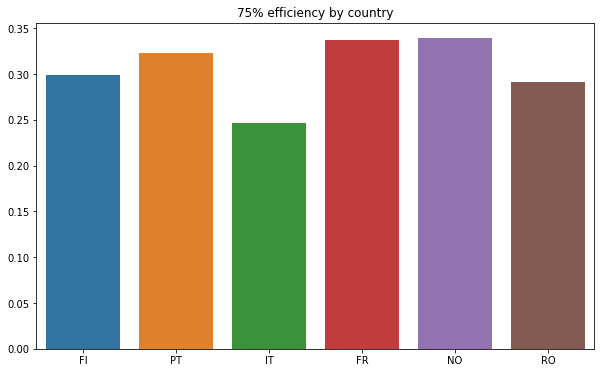

In [58]:
plot_by_country(temp_df, "75% efficiency by country", 6)

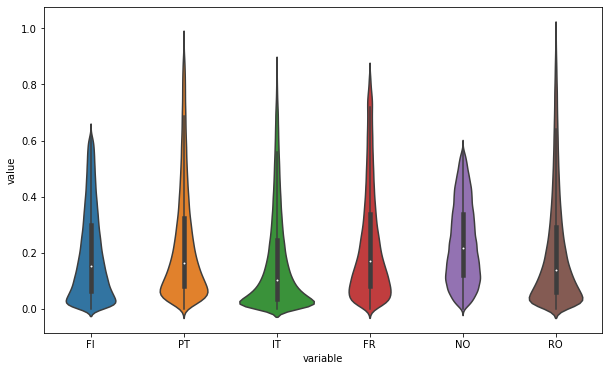

In [59]:
# credits : https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn
# This works because pd.melt converts a wide-form dataframe
plt.figure(figsize=(10, 6))
sns.violinplot(x="variable", y="value", data=pd.melt(temp_df))

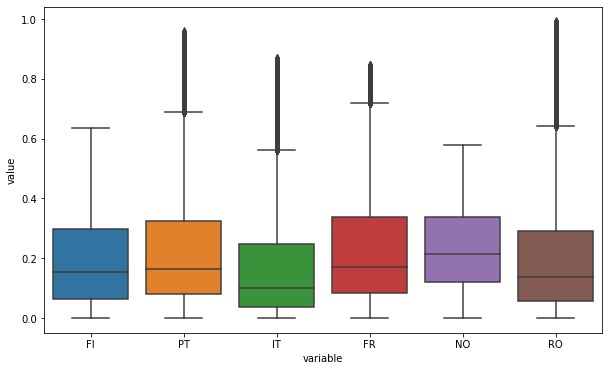

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(temp_df))

Text(0.5, 1.0, "Distribution of the station's efficiency")

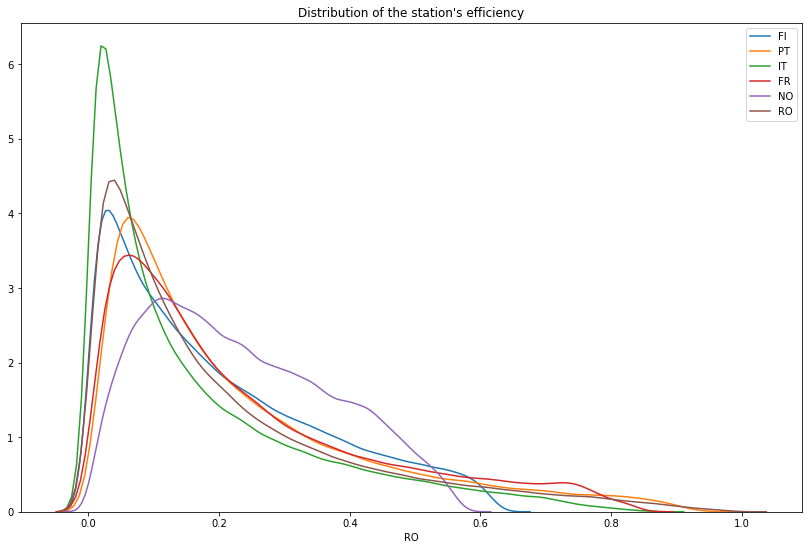

In [61]:
plt.figure(figsize=(14, 9))
for col in temp_df.columns:
    sns.distplot(temp_df[temp_df[col] != 0][col], label=col, hist=False)
plt.title("Distribution of the station's efficiency")

## Correlations

In [62]:
def plot_corr(df_):
    corr = df_.corr()
    corr

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 18))

    # Generate a custom diverging colormap
    #cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, center=0, square=True, cmap='Spectral', linewidths=.5, cbar_kws={"shrink": .5}) #annot=True

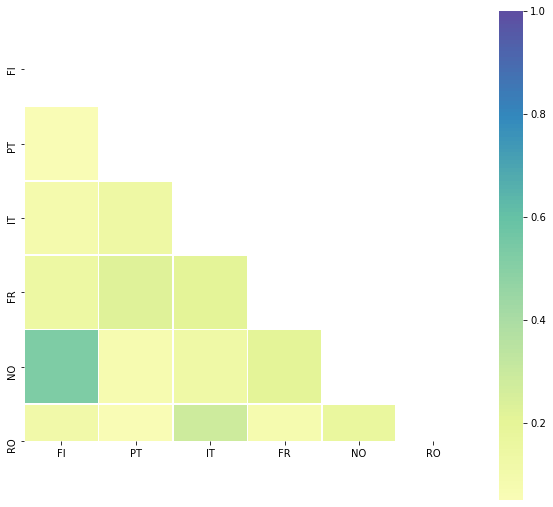

In [63]:
plot_corr(temp_df)

In [64]:
temp_df.corr()

,FI,PT,IT,FR,NO,RO
FI,1.000000,0.055113,0.087366,0.147905,0.530650,0.120007
PT,0.055113,1.000000,0.139590,0.222474,0.077719,0.050059
IT,0.087366,0.139590,1.000000,0.209693,0.134060,0.286878
FR,0.147905,0.222474,0.209693,1.000000,0.208549,0.085928
NO,0.530650,0.077719,0.134060,0.208549,1.000000,0.168180
RO,0.120007,0.050059,0.286878,0.085928,0.168180,1.000000


## Heatmap month vs hours 

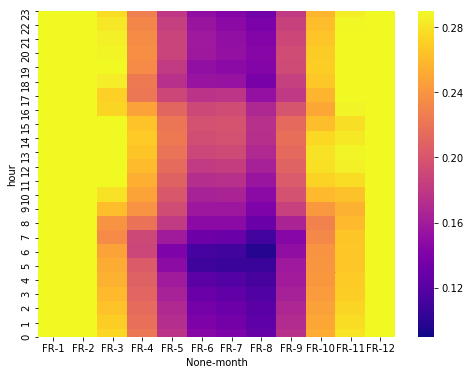

In [65]:
# credits S Godinho @ https://www.kaggle.com/sgodinho/wind-energy-potential-prediction

df_wind_on['year'] = df_wind_on['time'].dt.year
plt.figure(figsize=(8, 6))
temp_df = df_wind_on[['FR', 'month', 'hour']]
temp_df = temp_df.groupby(['hour', 'month']).mean()
temp_df = temp_df.unstack('month').sort_index(ascending=False)
sns.heatmap(temp_df, vmin = 0.09, vmax = 0.29, cmap = 'plasma')